# Определение перспективного тарифа для телеком-компании

Вы аналитик компании "Мегалайн" - федерального оператора сотовой связи.

Клиентам предлагают два тарифных плана: "Смарт" и "Ультра". Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше прибыли.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборкеклиентов. В вашем распоряжении данные 500 пользователей "Мегалайн": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод - какой тариф лучше.

**Описание тарифов**

**Тариф "Смарт":**

   - ежемесячная плата: 550 рублей
   - включено 500 минут разговоров, 50 сообщений и 15 Гб интернет-трафика
   - стоимость услуг сверх тарифного пакета:
       - минута разговора - 3 рубля
       - сообщение - 3 рубля
       - 1 Гб интернет-трафика - 200 рублей
       
**Тариф "Ультра":**

   - ежемесячная плата - 1950 рублей
   - включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   - стоимость услуг сверх тарифного пакета:
       - минута разговора - 1 рубль
       - сообщение - 1 рубль
       - 1 Гб интернет-трафика - 150 рублей
       
"Мегалайн" всегда округляет секунды до минут, а мегабайты до гигабайт. Каждый звонок округляется отдельно: даже если он длится 1 секунду, будет засчитана 1 минута. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону. Если абонент использует 1025 мегабайт в этом месяце, то с него возьмут плату за 2 гигабайта.  



Перед началом работы составим план:

1. Изучим данные, опишем имеющиеся ошибки в названиях, типах, пропуски, дубликаты и т.д.
2. Сделаем предобработку данных: исправим ошибки, заполним пропуски, приведем данные к нужным типам. Также в этом разделе дополнительно посчитаем для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам
    - количество отправленных сообщений по месяцам
    - объем израсходованного интернет рафика по месяцам
    - помесячну. выручка с каждого пользователя
3. Проведем анализ данных: опишем поведение клиентов оператора (количество минут разговора, сообщений, интернет-трафика). Посчитаем среднее количество, дисперсию, стандартное отклонение. Построим гистограммы, опишем распределения.
4. Проверим гипотезы:
    - средняя выручка пользователей тарифов "Ультра" и  "Смарт" различаются
    - средняя выручка пользователей из Москвы отличается от  выручки пользователей из других регионов
    
Приступим к выполнению проекта.

## Изучение данных из файлов

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from scipy import stats as st

В данной работе будем работать с пятью файлами. Откроем каждый из них и опишем их.

In [2]:
# откроем таблицу users
data_users = pd.read_csv('....csv')
display(data_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице видим 8 столбцов:
   - user_id - уникальный идентификатор пользователя
   - age - возраст пользователя (годы)
   - churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф еще действовал на момент выгрузки данных
   - city - город проживания пользователя
   - first_name - имя пользователя
   - last_name - фамилия пользователя
   - reg_date - дата подключения тарифа (день, месяц, год)
   - tariff - название тарифного плана

In [3]:
# общая информация по таблице
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
# выведем названия столбцов
print(data_users.columns)

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


In [5]:
# выведем размер таблицы
print('Размер таблицы:', data_users.shape[0])

Размер таблицы: 500


In [6]:
# выведем количесвто пропусков
print(data_users.isna().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [7]:
# определим количество явных дубликатов
print('Количество явных дубликатов:', data_users.duplicated().sum())

Количество явных дубликатов: 0


In [8]:
# создадим функцию для вывода уникальных значений по трем столбцам
def unique_names(name):
    """
    Возвращает отсортированный столбец уникальных значений
    
    param: name - название столбца
    """
    data_users_column = data_users[name]
    data_users_column_sorted = data_users_column.sort_values()
    data_users_column_sorted = data_users_column_sorted.unique()
    return data_users_column_sorted

In [9]:
list_name_columns = ['city', 'first_name', 'last_name']
for name in list_name_columns:
    print(unique_names(name))
    print()

['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']

['Авксентий' 'Агата' 'Агафья' 'Агнесса' 'Адам' 'Аким' 'Аксён' 'Алан'
 'Алевтина' 'Александр' 'Александра' 'Алексей' 'Алина' 'Алиса' 'Алла'

In [10]:
# посмотри названия тарифов в столбце tarif
print(data_users['tariff'].unique())

['ultra' 'smart']


In [11]:
# посмотрим значения возраста
print(data_users['age'].describe())

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64


Проведя предварительный анализ данных по таблице users, можно сделать выводы:
1. Размер таблицы 500 строк, в таблице 8 столбов
2. В названиях колонок нет ошибок
3. НЕобходимо изменить типы значений в столбцах:
   - churn_date на тип detatime
   - reg_date на тип detatime
4. Заполнять пропуски в столбце churn_date пока не будем
5. В столбце city каких-то вызывающих подозрение городов не выявлено, также не вызвали подозрения имена и фамилии пользователей.
6. В столбце age минимальные, максимальные значения в норме.

In [12]:
# откроем таблицу calls
data_calls = pd.read_csv("/datasets/calls.csv")
display(data_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В таблице 4 колонки:
   - id - уникальный номер звонка
   - call_date - дата звонка
   - ducation - длительность звонка в минутах
   - user_id - идентификатор пользователя, сделавшего звонок

In [13]:
# получим общую информацию о таблице
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [14]:
# выведем названия столбцов
print(data_calls.columns)

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')


In [15]:
# выведем размер таблицы
print('Общий размер таблицы:', data_calls.shape[0])

Общий размер таблицы: 202607


In [16]:
# определим количество пропусков
print(data_calls.isna().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64


In [17]:
# определим количество дубликатов
print('Количество дубликатов:', data_calls.duplicated().sum())

Количество дубликатов: 0


Проведя предварительный анализ данных по таблице calls можно сделать выводы:
1. Размер таблицы 202607 строк, в таблице 4 столбца
2. Все столбцы заполнены корректно, названия столбцов тоже, нет дубликатов и нет пропусков.
3. Стоит изменить тип данных в столбце call_date На datetime
4. В столбце duration надо округлить значения и заменить тип на целочисленный, так как по условиям, округдяется каждый звонок.

In [18]:
# откроем таблицу masseges
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице, в которой указывается количество сообщений пользователей, 3 столбца:
   - id - уникальный номер сообщения
   - message_date - дата сообщения
   - user_id - идентификатор пользователя, отправившего сообщение

In [19]:
# получим общую информацию о таблице
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
# посмотрим названия столбцов
print(data_messages.columns)

Index(['id', 'message_date', 'user_id'], dtype='object')


In [21]:
# определим размер таблицы
print('Размер таблицы:', data_messages.shape[0])

Размер таблицы: 123036


In [22]:
# определим количество пропусков
print(data_messages.isna().sum())

id              0
message_date    0
user_id         0
dtype: int64


In [23]:
# определим наличие дубликатов
print('Количество дубликатов:', data_messages.duplicated().sum())

Количество дубликатов: 0


После предварительного анализа данных можно сделать вывод:
1. В данной таблице серьезных ошибок нет
2. Нужно поменять формат даты для message_date на datetime

In [24]:
# исследуем таблицу internet
data_internet = pd.read_csv('/datasets/internet.csv')
display(data_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице 5 столбцов, 4 из которых описаны, а пятый скорее всего нумерация строк, данный столбец никак не описан:
   - Unnamed:0 - проверим гипотезу о том, что этот столбец для нумерации, и если это так, то удалим его
   - id - уникальный номер сессии
   - mb_used - объем потраченног за сессию интернет-трафика (в мегабайтах)
   - session_date - дата интернет-сессии
   - user_id - идентификатор пользователя

In [25]:
# получим общую информацию о таблице
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [26]:
# посмотрим названия столбцов
print(data_internet.columns)

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')


In [27]:
# размера таблицы
print('Размер таблицы:', data_internet.shape[0])

Размер таблицы: 149396


In [28]:
# количество пропусков
print(data_internet.isna().sum())

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


In [29]:
# наличие дубликатов
print('Количество дубликатов:', data_internet.duplicated().sum())

Количество дубликатов: 0


In [30]:
# посмотрим столбец с трафиком
print(data_internet['mb_used'].describe())

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64


In [31]:
# посмотрм на столбец Unnamed:0
print(data_internet['Unnamed: 0'].describe())

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64


После предварительного анализа таблицы получили:
1. Размер таблицы 149396 строк, 5 столбцов
2. Как оказалось столбец Unnamed: 0, это тоже нумерация строк, поэтому его можно удалить
3. Необходимо заменить тип данных в столбце session_date yd datetime
4. В столбце mb_used необходимо округлить значения, а затем заменить тип на целочисленный.

In [32]:
# посмотрим таблицу tariffs
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(data_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Перед нами таблица с 9 столбцами и общей информацией о тарифах:
   - masseges_included - количество сообщений в месяц, включенных в абонентскую плату
   - mb_per_month_included - объем интернет-трафика, включенного в абонентскую плату (в мегабайтах)
   - minutes_included - количество минут разговоров в месяц, включенных в абонентскую плату
   - rub_monthly_fee - ежемесячная абонентская плата в рублях
   - rub_per_gb - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета
   - rub_per_message - стоимость отправки сообщения сверх тарифного пакета
   - rub_per_minute - стоимость минуты разговора сверх тарифного плана
   - tariff_plan - название тарифа

In [33]:
# выведем общую информацию
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В данной таблице все хорошо, никакие типы данных менять не надо.

**Вывод:**

В ходе предварительного анализа данных были рассмотрены 5 таблиц:
1. users - информация о пользователях
2. calls - информация о звонках
3. messages - информация о сообщениях
4. internet - информация об интернет-трафике
5. tariffs - информация о тарифах

Были изучены данные и выявлены некоторые проблемы:
1. В таблицах, в которых присутствуют даты, данные столбцы надо заменять на тип данных datetime
2. В столбцах с минутами и интрнет-трафиком округлим значения до наибольшего целого, а затем изменим тип на целочисленный. Причем в столбце c интернет-трафиком сделаем это после подсчетов значений за месяц
3. В столбце churn_date пропуски заполнить пока не будем.

## Предобработка данных

В данном разделе мы:
1. Изменим типы данных в столбцах с датами, количеством минут и интернет-трафиком.
2. Посчитаем для каждого пользователя:
   - количество сделанных звонков и израсходованных минут по месяцам
   - количество отправленных сообщений по месяцам
   - объем израсходованног интернет трафика по месяцам
   - помесячную выручку с каждого пользователя

### Измененение типа данных 

In [34]:
# заменим тип данных в столбце reg_date  и churn_date таблицы users
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
#data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [35]:
# заменим тип данных в столбце call_date таблицы calls
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [36]:
# заменим тип данных в столбце message_date таблицы messages
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [37]:
# заменим тип данных в столбце session_date таблицы internet
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

**Вывод:** как видим в приведенных выше таблицах, тип значений в графах с датами изменился

Округлим столбец duration и приведем к целочисленному типу

In [38]:
# округлим до верхней границы значения с столбце duration и приведем к целочисленному типу
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls['duration'] = data_calls['duration'].astype('Int64')

In [40]:
# выведем общую информацию по таблицам, в которых меняли данные
list_data_name = [data_users, data_calls, data_messages, data_internet]
for data_name in list_data_name:
    print(data_name.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null Int64
user_id      202607 non-null int64
dtypes: Int64(1), datetime64[ns](1), int64(1), object(1)
memory usage: 6.4+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
us

**Вывод:** теперь видно, что в столбцах:
   - reg_date, call_date, message_date, session_date тип данных стал datetime 64
   - duration тип данных стал Int64
   
Кроме того, в столбце duration округлили минуты разговора каждого звонка, как об этом было указано в политике "Мегалайн".

###  Добавление дополнительных столбцов, группировка данных и объединение таблиц

В данном разделе нам необходимо посчитать для каждого пользователя:
   - количество сделанных звонков и израсходованных минут разговора по месяцам
   - количество отправленных сообщений по месяцам
   - объем израсходованного интернет-трафика по месяцам
   - помесячную выпучку с каждого пользователя.
   
Для того, чтобы все это определить, нам небходимо в таблицах data_calls, data_internet и data_messages создать дополнительный столбец, в котором будет указан месяц совершения звонка, избользования интернет-трафика или отправки сообщения.

Также для дальнейшей работы нам необходимо объединить все таблицы в одну, чтобы было удобнее проводить расчеты.

#### Добавим дополнительные столбцы

Для каждой таблицы создадим необходимые столбцы.

In [41]:
# добавим дополнительный столбец в таблице date_calls
data_calls['month'] = data_calls['call_date'].dt.month

In [42]:
# добавим дополнительный столбец в таблице date_messages
data_messages['month'] = data_messages['message_date'].dt.month

In [43]:
# добавим дополнительный столбец в таблице date_internet
data_internet['month'] = data_internet['session_date'].dt.month

In [45]:
# выведем на экран таблицы, в которых меняли данные
list_data_name = [data_calls, data_messages, data_internet]
for data_name in list_data_name:
    data_name.head()
    print()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


Видим, что в каждой таблице появился дополнительный столбец с номером месяца совершения звонка, написания сообщения, использования интернет-трафика.

#### Группировка таблиц

Далее проведем группировку разговоров, сообщений и интернет-трафика по месяцам и по пользователям.

In [46]:
# группировка таблицы data_calls по месяцам и пользователям
data_calls_grouped = (data_calls.groupby(['user_id', 'month'])
                      .agg({'duration': 'sum'})
                      .reset_index()
                      .rename(columns={'duration': 'total_month_duration'})
                     )

In [47]:
# выведем на экран первые 15 строк таблицы, чтобы убедиться, что все получилось, как надо
display(data_calls_grouped.head(15))

,user_id,month,total_month_duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
5,1000,10,350
6,1000,11,338
7,1000,12,333
8,1001,11,430
9,1001,12,414


In [48]:
# группировка таблицы data_messages по месяцам и пользователям
data_messages_grouped = (data_messages.groupby(['user_id', 'month'])
                      .agg({'id': 'count'})
                      .reset_index()
                      .rename(columns={'id': 'total_month_messages'})
                     )

In [49]:
# выведем на экран первые 15 строк таблицы, чтобы убедиться, что все получилось, как надо
display(data_messages_grouped.head(15))

,user_id,month,total_month_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [50]:
# группировка таблицы data_internet по месяцам и пользователям
data_internet_grouped = (data_internet.groupby(['user_id', 'month'])
                      .agg({'mb_used': 'sum'})
                      .reset_index()
                      .rename(columns={'mb_used': 'total_month_mb_used'})
                     )

In [51]:
# выведем на экран первые 15 строк таблицы, чтобы убедиться, что все получилось, как надо
display(data_internet_grouped.head(15))

,user_id,month,total_month_mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


Как видим, во всех таблицах появились новые столбцы. Исходя из политики компании "Мегалайн" для веб-трафика отдельные сессии не считаются, вместо этого общая сумма за месяц округляется в большую сторону. Соответственно, мы можем округлить до гигабайт данные столбца total_month_mb_used и изменить тип данных в этом столбце. Но лучше создать новый столбец для наглядности.

In [52]:
# создадим столбец с уже округленными гигабайтамибб а также изменим тип данных
data_internet_grouped['total_month_mb_used'] = (np.ceil(data_internet_grouped['total_month_mb_used'].div(1024))).astype('int64')

In [53]:
# выведем на экран получившуюся таблицу с округленными в гигабайт интрернет-трафик
display(data_internet_grouped.head())

,user_id,month,total_month_mb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [54]:
# переименуем столбец
data_internet_grouped = data_internet_grouped.rename(columns={'total_month_mb_used': 'total_month_gb_used'})

In [55]:
# выведем на экран информацию по таблице data_grouped_internet
data_internet_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id                3203 non-null int64
month                  3203 non-null int64
total_month_gb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


**Вывод:** в ходе проведенной работы в данном разделе мы:
   - сгруппировали таблицы звонков, сообщений и интернет-трафика по месяцамм и пользователям
   - округлили интернет-трафиг в мегабайтах до гигабайтов и изменили тип данных в данном столбце.

#### Объединение таблиц

Теперь нам необходимо все таблицы:
   - data_users
   - data_calls_grouped
   - data_messages_grouped
   - data_internet_grouped
   - data_tariff
   
объединить в одну таблицу. Сделаем это при помощи метода merge.

Для того, чтобы таблица была наглядной, объедим сначала две таблицы data_users и data_tariffs, первоначально заменив в таблице data_tariffs столбец tariff_name на tariffs, иначе с таблицей data_user, не будет общих столбцов.

In [56]:
# выведем на экран таблицу data_tariffs
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [57]:
# переименуем название столбца
data_tariffs = data_tariffs.rename(columns={'tariff_name': 'tariff'})

In [58]:
display(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [59]:
# объединим две таблицы
data = data_users.merge(data_tariffs, on = 'tariff', how = 'outer')

In [60]:
# отсортируем талблицу data по столбцу user_id и переустановим индекс
data = data.sort_values(by = 'user_id').reset_index(drop=True)

In [61]:
# выведем полученную таблицу на экран
display(data.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,1000,30720,3000,1950,150,1,1


По аналогии соединим таблицы data_calls_grouped, data_messenges_grouped и data_internet_grouped. После чего объеденим все таблицу в одну

In [62]:
# объединим таблицы data_calls_grouped и data_messanges_grouped
data_calls_messages = data_calls_grouped.merge(data_messages_grouped, on=['user_id', 'month'], how = 'outer')

In [63]:
# объединим таблицы data_calls_messages и data_internet_grouped
data_calls_messages_internet = data_calls_messages.merge(data_internet_grouped, on=['user_id', 'month'], how = 'outer')

In [64]:
# выведем на экран получившуюся таблицу
display(data_calls_messages_internet.head(15))

,user_id,month,total_month_duration,total_month_messages,total_month_gb_used
0,1000,5,159,22.0,3.0
1,1000,6,172,60.0,23.0
2,1000,7,340,75.0,14.0
3,1000,8,408,81.0,14.0
4,1000,9,466,57.0,15.0
5,1000,10,350,73.0,15.0
6,1000,11,338,58.0,15.0
7,1000,12,333,70.0,10.0
8,1001,11,430,NaN,18.0
9,1001,12,414,NaN,14.0


In [65]:
# объединим таблицу data_calls_messages_internet с data
data = data.merge(data_calls_messages_internet, on = 'user_id', how = 'left')

In [66]:
# выведем полученную таблицу на экран
display(data.sort_values(by = 'user_id').head(20))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,total_month_duration,total_month_messages,total_month_gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.0,159,22.0,3.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.0,172,60.0,23.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7.0,340,75.0,14.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8.0,408,81.0,14.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9.0,466,57.0,15.0
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10.0,350,73.0,15.0
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11.0,338,58.0,15.0
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12.0,333,70.0,10.0
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,11.0,430,NaN,18.0
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,12.0,414,NaN,14.0


In [67]:
# выведем информацию по новой таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month                    3214 non-null float64
total_month_duration     3174 non-null Int64
total_month_messages     2717 non-null float64
total_month_gb_used      3203 non-null float64
dtypes: Int64(1), d

<div class="alert alert-success">
<h3>✔ Комментарий ревьюера</h3>
    
Всё верно, с `outer` ничего не потеряешь
</div>    


Увидели интересную особенноость:
   - в столбцах month, total_month_messages, total_month_mb_used изменен тип данных на вещественный, хотя до этого был целочисленный. Скорее всего это связано с тем, что в столбцах появились Nan. Снова изменим тип
   - кроме того в столбцах chure_date, month, total_month_duration, total_month_messages_total_month_mb_used появились пропуски, с которыми необходимо разобраться.

In [68]:
# изменим типы данных ы указанных столбцах
list_columns_need_change_type = ['month', 'total_month_messages', 'total_month_gb_used']
for name in list_columns_need_change_type:
    data[name] = data[name].astype('Int64')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
month                    3214 non-null Int64
total_month_duration     3174 non-null Int64
total_month_messages     2717 non-null Int64
total_month_gb_used      3203 non-null Int64
dtypes: Int64(4), datetim

In [70]:
# выведем пропускиp
print(data.isna().sum())

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month                       2
total_month_duration       42
total_month_messages      499
total_month_gb_used        13
dtype: int64


In [71]:
# выведем список пропусков в %
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    print('{} - {}%'.format(col, round((pct_missing * 100), 2)))

user_id - 0.0%
age - 0.0%
churn_date - 94.12%
city - 0.0%
first_name - 0.0%
last_name - 0.0%
reg_date - 0.0%
tariff - 0.0%
messages_included - 0.0%
mb_per_month_included - 0.0%
minutes_included - 0.0%
rub_monthly_fee - 0.0%
rub_per_gb - 0.0%
rub_per_message - 0.0%
rub_per_minute - 0.0%
month - 0.06%
total_month_duration - 1.31%
total_month_messages - 15.52%
total_month_gb_used - 0.4%


По столбцу churn_date пропуски ничем менять не будем, так как отсутствующие значения говорят о том, что человек еще пользуется связью.

По столбцам total_month_duration и total_month_gb_used процент пропусков 1.31 и 0.4 соответственно. В данных столбцах мы пропуски заменим на нули, так как пропуски говорят о том, что звонков и интренет трафика не было, люди могут использовать другие способы связи.

В столбце total_month_messages пропуски можно заполнить нулями, так как пропуски, скорее всего, связаны с тем, что человек пользовался интернетом и минутами, но при этом в этом месяце не отправлял смс. Но и ситуации, что сообщение не дошло до адресата быть не может, смс либо ушло, либо нет. Поэтому заменим пропуски в данном столбце нулями.

In [72]:
# выведем информацию о столбце с сообщениями
print(data['total_month_messages'].describe())

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: total_month_messages, dtype: float64


Как видим, здесь минимальное значение 1, поэтому пропуски можем заполнить нулями. Это будеи говорить о том, что человек вообще не пользовался данным сервисом.

In [74]:
# заполним пропуски в столбах из списка
list_name = ['total_month_duration', 'total_month_messages', 'total_month_gb_used']
for name in list_name:
    name.fillna(0)

In [75]:
# выведем пропуски
print(data.isna().sum())

user_id                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
month                       2
total_month_duration        0
total_month_messages        0
total_month_gb_used         0
dtype: int64


In [76]:
# выведем информацию о столбце с сообщениями
print(data['total_month_messages'].describe())

count    3216.000000
mean       38.257463
std        36.149684
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: total_month_messages, dtype: float64


In [77]:
# проверим наличие дубликатов
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


Как видим, столбцы заполнились нужными значениями, дубликатов нет.

После того, как вся информация была собрана в одну таблицу, можно добавить дополнительную информацию о помесячной выручке с каждого пользователя.

#### Расчет помесячной выручки с каждого пользователя

In [78]:
def count_income_per_user(row):
    """
    Возвращает общую стоимость по каждому абоненту с учетом всех перерасходов
    
    param: row - строка датафрейма data
    """
    total_pay = row['rub_monthly_fee']
    minute_pay = (row['total_month_duration'] - row['minutes_included']) * row['rub_per_minute']
    message_pay = (row['total_month_messages'] - row['messages_included']) * row['rub_per_minute']
    gb_used_pay = (row['total_month_gb_used'] - np.ceil(row['mb_per_month_included'] / 1024)) * row['rub_per_gb']
    
    for i in [minute_pay, message_pay, gb_used_pay]:
        if i > 0:
            total_pay += i
        
    return total_pay

In [80]:
# применим функцию в каждой строке датафрейма
data['income_per_user'] = data.apply(count_income_per_user, axis=1)

In [81]:
# выведем получившися датасет
display(data.head(10))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,total_month_duration,total_month_messages,total_month_gb_used,income_per_user
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,159,22,3,1950.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,172,60,23,1950.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,7,340,75,14,1950.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,8,408,81,14,1950.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,9,466,57,15,1950.0
5,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,10,350,73,15,1950.0
6,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,11,338,58,15,1950.0
7,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,12,333,70,10,1950.0
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,11,430,0,18,1150.0
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,12,414,0,14,550.0


In [82]:
# выведем описание столбца
print(data['income_per_user'].describe())

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: income_per_user, dtype: float64


Стобец с общей стоимостью услуг добавили. Некоторые строки проверили, считается все корректно. Метод describe тоже никаких подозрительных данных не показал.

#### Вывод

В ходе проделанной работы по предобработке данных было сделано следующее:
1. Изменены типы данных в столбцах:
   - reg_date
   - call_date
   - message_date
   - session_date
   - duration
   - mb_used

2. Округлены данные в столбцах duration и mb_used в соответствии с тарифной политикой "Мегалайн".

3. Были сгруппированы по месяцам и пользователям таблицы:
   - data_calls
   - data_messages
   - data_internet
   
4. Все таблицы объединены в одну.

5. Обработана часть пропусков.

6. Рассчитана общая стоимость услуг с учетом перерасходов по каждому пользователю.

## Анализ данных

После того, как вся необходимая предобработка данных была произведена и данные подготовлены, мы можем провести их анализ. Поэтому, в данном разделе нам необходимо:
1. Описать поведение клиентов опреатора, исходя из выборки (сколько минут разговора, сколько сообщений, сколько интернет-трафика требуется пользователям каждого тарифа в месяц).
2. Посчитать среднее количество, дисперсию и стандартное отклонение.
3. Построить графики и описать распределения.

### Описание поведения клиентов опреатора, исходя из выборки

#### Минуты разговора

In [83]:
# создадим две таблицы, одну для таблицы ultra, другую для тарифа smart
data_smart = data.query('tariff == "ultra"')
data_ultra = data.query('tariff == "smart"')

In [84]:
# выведем количество человек, подключенных к каждому тарифу
print(data['tariff'].value_counts())

smart    2230
ultra     986
Name: tariff, dtype: int64


In [85]:
# определим количество человек, которые истользуют казные тарифы
print('Количество человек, использующих тариф smart', data[data['tariff'] == 'smart']['user_id'].nunique())
print('Количество человек, использующих тариф ultra', data[data['tariff'] == 'ultra']['user_id'].nunique())

Количество человек, использующих тариф smart 351
Количество человек, использующих тариф ultra 149


Тарифом smart пользуется намного больше пользователей, чем тарифом ultra. Скорее всего из-за высокой абоненского платы второго. Но так ли хорош smart?

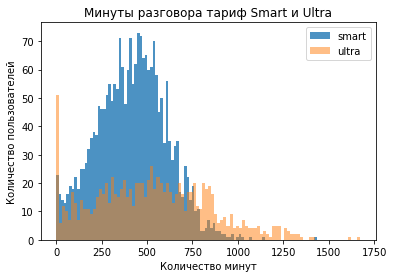

In [86]:
# построим гистограмм минут разговора по тарифам
data[data['tariff'] == "smart"]['total_month_duration'].plot(kind='hist', bins=100, alpha=0.8)
data[data['tariff'] == "ultra"]['total_month_duration'].plot(kind='hist', bins=100, alpha=0.5)
plt.title('Минуты разговора тариф Smart и Ultra')
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество минут')
plt.ylabel('Количество пользователей')
plt.show()

In [87]:
# рассчитаем среднюю, медиану, дисперстю и стандартное отклонение
(data.groupby('tariff')
 .agg({'total_month_duration': ['mean', 'median', 'var', 'std']})
 .style.format('{:.2f}')
)

In [88]:
# выведем информацию по количеству звонков тариф smart
print(data[data['tariff'] == 'smart']['total_month_duration'].describe())

count    2230.000000
mean      417.747534
std       190.476754
min         0.000000
25%       282.000000
50%       421.500000
75%       545.000000
max      1435.000000
Name: total_month_duration, dtype: float64


In [89]:
# выведем информацию по количеству звонков тариф smart
print(data[data['tariff'] == 'ultra']['total_month_duration'].describe())

count     986.000000
mean      526.089249
std       317.887549
min         0.000000
25%       282.500000
50%       518.000000
75%       751.750000
max      1673.000000
Name: total_month_duration, dtype: float64


По графикам и полученным данным видно, что большая часть пользователей в тарифе smart сосредоточена в районе от 250 до 500 минут, также заметно, что достаточно большое количество пользователей данного тарифа все-таки превышают свой месячный лимит по минутам разговора. Среднее значение - 417 минут, медиана - 421 минута, межквартильный размах от 282 до 545 минуты. Диаграмма - имеет нормальное распределение, скошена вправо.

А по графику для тарифа ultra видно более равномерное распределение, но это распределение остается нормальным, есть пик в районе нуля. Также видно, что среднее значение минут разговоров - 526, что больше, чем в тарифе smart. Медиана составляет 518, межквартильный размах от 282 до 751 минут. Кроме того заметно, что в данном тарифе люди не превышают лимит минут для звонков.

#### Количество сообщений

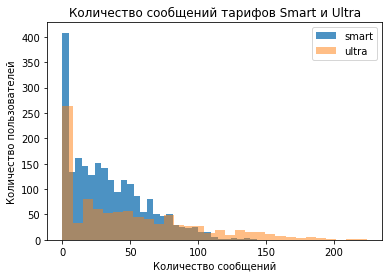

In [90]:
# построим гистограммы количества сообщений по тарифам
data[data['tariff'] == "smart"]['total_month_messages'].plot(kind='hist', bins=30, alpha=0.8)
data[data['tariff'] == "ultra"]['total_month_messages'].plot(kind='hist', bins=30, alpha=0.5)
plt.title('Количество сообщений тарифов Smart и Ultra')
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество сообщений')
plt.ylabel('Количество пользователей')
plt.show()

In [91]:
# рассчитаем среднюю, медиану, дисперстю и стандартное отклонение
(data.groupby('tariff')
 .agg({'total_month_messages': ['mean', 'median', 'var', 'std']})
 .style.format('{:.2f}')
)

In [92]:
# выведем информацию по количество сообщений тариф smart
print(data[data['tariff'] == 'smart']['total_month_messages'].describe())

count    2230.000000
mean       33.369058
std        28.230396
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: total_month_messages, dtype: float64


In [93]:
# выведем информацию по количество сообщений тариф ultra
print(data[data['tariff'] == 'ultra']['total_month_messages'].describe())

count    986.000000
mean      49.313387
std       47.806040
min        0.000000
25%        6.000000
50%       38.000000
75%       78.750000
max      224.000000
Name: total_month_messages, dtype: float64


Графики для обоих тарифов имеют распределение Пуассона. Также для пользователей обоих тарифов заметно, что большая часть не использует сообщения. Для тарифа ultra лимит количества сообщений установлен в размере 1000, для тарифа smart - 50. Таким образом, пользователи тарифа smart частенько превышают лимит, а вот пользователи другого тарифа его не превышают. 

Для тарифа smart среднее значение отправленных сообщений составляет - 33, медиана - 28, межквартильный размах от 10 до 51.
Для тарифа ultra среднее значение отправленных сообщений составляет - 49, медиана - 38, межквартильный размах от 6 до 79.

Кроме того, исходя из данных диаграмм можно скзать, что лимит количества сообщений в 1000, это слишком много, так как максимальное количество сообщений по двум выборкам - 220.

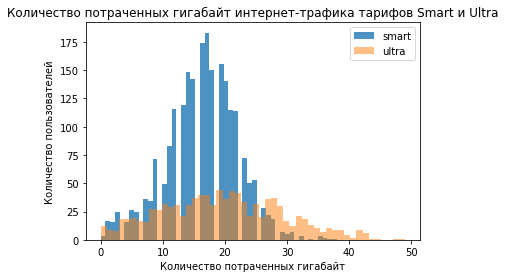

In [94]:
# построим гистограммы количества использованных гигабайт по тарифам
data[data['tariff'] == "smart"]['total_month_gb_used'].plot(kind='hist', bins=50, alpha=0.8)
data[data['tariff'] == "ultra"]['total_month_gb_used'].plot(kind='hist', bins=50, alpha=0.5)
plt.title('Количество потраченных гигабайт интернет-трафика тарифов Smart и Ultra')
plt.legend(['smart', 'ultra'])
plt.xlabel('Количество потраченных гигабайт')
plt.ylabel('Количество пользователей')
plt.show()

In [95]:
# рассчитаем среднюю, медиану, дисперстю и стандартное отклонение
(data.groupby('tariff')
 .agg({'total_month_messages': ['mean', 'median', 'var', 'std']})
 .style.format('{:.2f}')
)

In [96]:
# выведем информацию по количеству потраченных гигабайт тариф smart
print(data[data['tariff'] == 'smart']['total_month_gb_used'].describe())

count    2230.000000
mean       16.321525
std         5.756167
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: total_month_gb_used, dtype: float64


In [97]:
# выведем информацию по количеству потраченных гигабайт тариф ultra
print(data[data['tariff'] == 'ultra']['total_month_gb_used'].describe())

count    986.000000
mean      19.474645
std        9.868057
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: total_month_gb_used, dtype: float64


Оба графика имеют нормальное распределение, причем по тарифу ulrta это значение больше похоже на равномерное. Такжи по расчетам и графикам видно, что пользователи обоих тарифов превышают установленный лимит интернет-трафика, причем по тарифу smart это превышение значительное.

Для тарифа smart среднее количество гигабайт в месяц - 16, медиана - 17, межквартильный размах от 13 до 20.

Для тарифа ultra среднее количество гигабайт в месяц - 19, медиана - 19, межквартильный размах от 12 до 27.

Данное исследование показало, что пользователям обоих тарифов не хватает количества интернет-трафика, включенного в пакет услуг. 

In [98]:
# рассчитаем среднюю, медиану, дисперстю и стандартное отклонение
(data.groupby('tariff')
 .agg({'income_per_user': ['mean', 'median', 'var', 'std']})
 .style.format('{:.2f}')
)

Также выведя среднее, общее дисперсию, стандартное оклонение по выручке, видим по медианным значениям, что половина пользователей тарифа ultra укладывается в тарифный план и судя по среднему, переплата получается незначительная. В то время как по тарифу smart половина пользоватлей не укладывается в тарифный план, а срднее значение платежа для данных пользователей в два раза выше тарифного плана.

#### Вывод

После проведения анализа данных и построения гистограмм можно сделать следующие выводы:
1. Тарифом smart пользуются бооьше пользователей, чем тарифом ultra. Скорее всего это связано с низкой платой за тариф. И это, в целом оправдано, так как по итогам в среднем на тарифе smart с учетом всех пересходов платят около 1300 рублей, что значительно ниже тарифного плана ultra.

2. Если говорить о длительности звонков, то на тарифе smart в среднем длительность составляет 417 минут, на ultra - 526 минут. Кроме того, пользователи smart частто выходят за пределы лимитов, в то время как у ultra остается много неиспользованных минут.

3. На обоих тарифах сообщения практически не используются. Кроме того, на тарифе ultra слишком завышен лимит.

4. Если говорить об использованном интернет-трафике. ТО пользователи обоих тарифов превышают установленные лимиты. В среднем размер интернет-трафика на тарифе smart - 33 Гб, на тарифе ultra - 49 Гб.

5. По поводу стоимости тарифов для пользователей, половина пользователей тарифа ultra укладывается в абонентскую плату, в то время как smart не укладываются в абонентскую плату. Но при этом с учетом переплат, стоимость тарифа smart ниже абонентской платы по тарифу ultra.

## Проверка гипотез

В ходе данного этапа необходимо проверить 2 гипотезы:
1. средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются
   
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
   
Проверим эти гипотезы, но для начала избавимся от выбросов. Будем использовать метод IQR для отсечения выбросов.

### Очистка от выбросов

В соответствии с методом IQR будем отсекать выбросы, которые лежат ниже границы Q1-1,5IQR, что соответствует нижней границе "ящика с усами", и которые лежат выше Q3 + 1,5IQR, что соответствует верхей границе "ящика с усами".

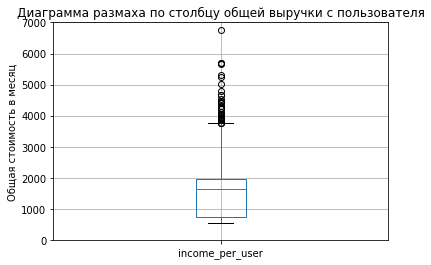

In [99]:
# построим ящик с усами
data.boxplot(column='income_per_user')
plt.ylim(0, 7000)
plt.title('Диаграмма размаха по столбцу общей выручки с пользователя')
plt.ylabel('Общая стоимость в месяц')
plt.show()

Да, по диаграмме размаха мы видимо, что имеются выбросы в районе 4000 тысяч рублей, отсечем эти значения. Рассчитаем интервалы.

In [100]:
# Рассчитаем Q1, Q3, IQR
Q1 = data['income_per_user'].quantile(0.25)
Q3 = data['income_per_user'].quantile(0.75)
IQR = Q3 - Q1

In [101]:
# очистим датасет от выбросов
good_data = data.query('(income_per_user > @Q1 - 1.5 * @IQR) and (income_per_user < @Q3 + 1.5 * @IQR)')

In [102]:
# определим процент, от которых очистили датасет
print(f'Доля выбросов: {(data.shape[0] - good_data.shape[0]) / data.shape[0] * 100}%')

Доля выбросов: 1.4303482587064678%


In [103]:
good_data.groupby('tariff').agg({'income_per_user': ['mean', 'median', 'var', 'std']})

income_per_user                                   
                  mean  median            var         std
tariff                                                   
smart      1250.174762  1007.0  542179.801870  736.328596
ultra      2033.298862  1950.0   72363.122804  269.003946

Датасет подготовлен для дальнейшего анализа. Доля исключенных выбросов несущественна около 1.43%. Для оценки гипотез будем использовать t-критерий Стьюдента, так как сравниваются выборки, независимые между собой и сравнивать мы будем срелние двух генеральных совокупностей.

### Гипотеза о равенстве средних двух генеральных совокупностей №1

В рамках данного раздела проверим гипотезу:
- Ho: средняя выручка пользователей тарифов "Ультра" и "Смарт" НЕ различаются
- H1: средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются

In [104]:
# создадим столбцы с выручкой для smart 
smart = good_data.query('tariff == "smart"')
smart = smart['income_per_user']

In [105]:
# создадим столбцы с выручкой для ultra
ultra = good_data.query('tariff == "ultra"')
ultra = ultra['income_per_user']

Общепринятый критический уровень статистической значимости от 5% до 1%. В нашем исследовании установим это значение нестрогим - 5%.

In [106]:
# устанавливаем критический уровень статистической значимости
alpha = 0.05

In [107]:
# проведем расчет вероятности
results = st.ttest_ind(ultra, smart)

In [108]:
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

p-значение: 1.9373697819520892e-196
Отвергаем нулевую гипотезу


В ходе теста мы получили слишком маленькую вероятность, которая говорит о том, что вероятность, того, что выручки не отличаются слишком мала. На самом деле это видно из проведенных расчетов. Разница не случайна, есть значимые различия между показателями выручки тарифов smart и ultra.

### Гипотеза о равенстве средних двух генеральных совокумностей №2

В рамках данного раздела проверим гопитезу:
- Но - средняя выручка пользователей из москвы НЕ отличается от выручки пользователей из других регионов
- Н1 - средняя выручка пользователей из москвы отличается от выручки пользователей из других регионов

In [109]:
# выведем уникальные значения столбца city
print(good_data['city'].unique())

['Краснодар' 'Москва' 'Стерлитамак' 'Новокузнецк' 'Набережные Челны'
 'Ульяновск' 'Челябинск' 'Пермь' 'Тюмень' 'Самара' 'Санкт-Петербург'
 'Иваново' 'Чебоксары' 'Омск' 'Уфа' 'Томск' 'Чита' 'Мурманск'
 'Петрозаводск' 'Тверь' 'Екатеринбург' 'Махачкала' 'Вологда' 'Череповец'
 'Ярославль' 'Сочи' 'Хабаровск' 'Ставрополь' 'Рязань' 'Улан-Удэ' 'Тула'
 'Саратов' 'Ростов-на-Дону' 'Казань' 'Иркутск' 'Курск' 'Калуга' 'Якутск'
 'Астрахань' 'Химки' 'Владикавказ' 'Волгоград' 'Саранск' 'Ижевск'
 'Новосибирск' 'Брянск' 'Тольятти' 'Нижний Тагил' 'Орёл' 'Белгород'
 'Воронеж' 'Волжский' 'Курган' 'Барнаул' 'Красноярск' 'Архангельск'
 'Липецк' 'Кемерово' 'Киров' 'Сургут' 'Пенза' 'Магнитогорск'
 'Нижний Новгород' 'Кострома' 'Владивосток' 'Тамбов' 'Балашиха'
 'Севастополь' 'Калининград' 'Оренбург' 'Смоленск' 'Нижневартовск'
 'Владимир' 'Новороссийск' 'Грозный' 'Подольск']


Таким образом, разделим весь датасет на 2 части: Москва и регионы

In [110]:
# создадим столбцы с выручкой для Москвы 
moscow = good_data.query('city == "Москва"')
moscow = moscow['income_per_user']

In [111]:
# создадим столбцы с выручкой для регионов
region = good_data.query('city != "Москва"')
region = region['income_per_user']

In [112]:
# устанавливаем критический уровень статистической значимости
alpha = 0.05

In [113]:
# проведем расчет вероятности
results = st.ttest_ind(moscow, region)

In [114]:
print(f'p-значение: {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получится отвергнуть нулевую гипотезу')

p-значение: 0.18114596649899925
Не получится отвергнуть нулевую гипотезу


С вероятностью 18% такой результат может быть получен случайно. Значимых различий межжду выручкой от пользователей из Москвы и пользователей из регионов нет.

### Вывод

В ходе проведенной работы в данном разделе:
1. Принимаем гипотезу о тм, что средняя выручка пользователей тарифа "Смарт" и "Ультра" различаются

2. Отвергаем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Общий вывод

В ходе проведенной работы:

1. В ходе предварительного анализа данных были рассмотрены 5 таблиц, в которых были выявлены некоторые проблемы (даты надо заменять на тип данных datetime, столбцы с минутами и интернет трафиком необходимо было округлять и также менять тип данных на целочисленных,в столбце churn_date пропуски решили не заполнять).

2. В ходе предобработки данных:
1) Изменены типы данных в столбцах:
   - reg_date
   - call_date
   - message_date
   - session_date
   - duration
   - mb_used
2) Округлены данные в столбцах duration и mb_used в соответствии с тарифной политикой "Мегалайн".
3) Были сгруппированы по месяцам и пользователям таблицы:
   - data_calls
   - data_messages
   - data_internet
4) Все таблицы объединены в одну.
5) Обработана часть пропусков.
6) Рассчитана общая стоимость услуг с учетом перерасходов по каждому пользователю.

3. В рамках анализа данных можно сделать следующие выводы:
   - тарифом smart пользуются бооьше пользователей, чем тарифом ultra. Скорее всего это связано с низкой платой за тариф. И это, в целом оправдано, так как по итогам в среднем на тарифе smart с учетом всех пересходов платят около 1300 рублей, что значительно ниже тарифного плана ultra.
   - если говорить о длительности звонков, то на тарифе smart в среднем длительность составляет 417 минут, на ultra - 526 минут. Кроме того, пользователи smart частто выходят за пределы лимитов, в то время как у ultra остается много неиспользованных минут.
   - на обоих тарифах сообщения практически не используются. Кроме того, на тарифе ultra слишком завышен лимит.
   - если говорить об использованном интернет-трафике. ТО пользователи обоих тарифов превышают установленные лимиты. В среднем размер интернет-трафика на тарифе smart - 33 Гб, на тарифе ultra - 49 Гб.
   - по поводу стоимости тарифов для пользователей, половина пользователей тарифа ultra укладывается в абонентскую плату, в то время как smart не укладываются в абонентскую плату. Но при этом с учетом переплат, стоимость тарифа smart ниже абонентской платы по тарифу ultra.
   
4. В ходе проверки гипотез:
   - принимаем гипотезу о тм, что средняя выручка пользователей тарифа "Смарт" и "Ультра" различаются
   - отвергаем гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
   
Вывод о поведении клиентов и определение лучшего тарифа для компании:
1. В ходе проведенной работы можно охариктеризовать поведение клиентов разных тарифов следующим образом:
   - пользователи тарифа smart: стоимость данного тарифа низкая из двух стравниваемых, пользователей это привлекает, при этом среднее количество минут разговора составляет 417, и этого количества в большинстве случаев не хватает пользователям, есть лимиты по сообщениям, но данным сервисом практически не пользуются, если говорить об использовании интернеты, то в среднем трафик составляет около 33 Гб, что значительно выше установленного лимита. В целом по данному тарифу видно, что людям по значимым направлениям не хватает установленных лимитов, приходится в большинстве случаев платить больше, чем указано в тарифе.
   - пользователи тарифа ultra: стоимость данного тарифа значительно выше, чем стоимость тарифа smart, данным тарифом пользуется намного меньше пользователей, при этом среднее время разговора в минутах составляет 526 минут, что намного ниже установленного лимита, на данном тарифе люди также практически не пользуются сервисом отправки сообщений, при этом лимит здесь установлен достаточно высокий, также можно сказать, что пользователи данного тарифа активнее всего пользуются интернетом, средний размер интернет трафика около 49 Гб, что выше установленного лимита. В среднем пользователи превышают установленные лимиты на тарифе, но превышение это незначительное.
2. Исходя из приведенного анализа видно, что для компании выгоден тариф smart, так как кажущаяся дешевизна тарифа оборачивается постонными и значительными переплатами для пользователей тарифа smart, а так как низкая стоимость тарифа привлекает очень много пользователей, то и выручка по данному тарифу будет польше, поэтому тариф smart выгоднее для компании.
   
Небольшая ремарка, рекомендации для "Мегалайн":
1. Изменить условия тарифов, так как на тарифе ultra остаются неиспользованые минуты.
2. Изменить лимиты интернет-трафика, в пользу их увеличения, чтобы пользователи "не нервничали"б что им постоянно не хватает трафика.
3. Пересмотреть лимиты по сообщениям, как выяснили, люди мало пользуются данным сервисом.